<a href="https://colab.research.google.com/github/Dinesh02Patil/Breast-Cancer-Prediction/blob/main/breast_cancer_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lifelines
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)

In [ ]:
data = pd.read_csv('/content/Breast Cancer METABRIC (1).csv')

data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
num_entries = data.shape[0]

# Number of columns
num_columns = data.shape[1]

# Data types of each column
data_types = data.dtypes

# Missing values in each column
missing_values = data.isnull().sum()

# Display the results
print(f"Number of Entries: {num_entries}")
print(f"Number of Columns: {num_columns}")
print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)

Number of Entries: 2509
Number of Columns: 34

Data Types:
Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code    

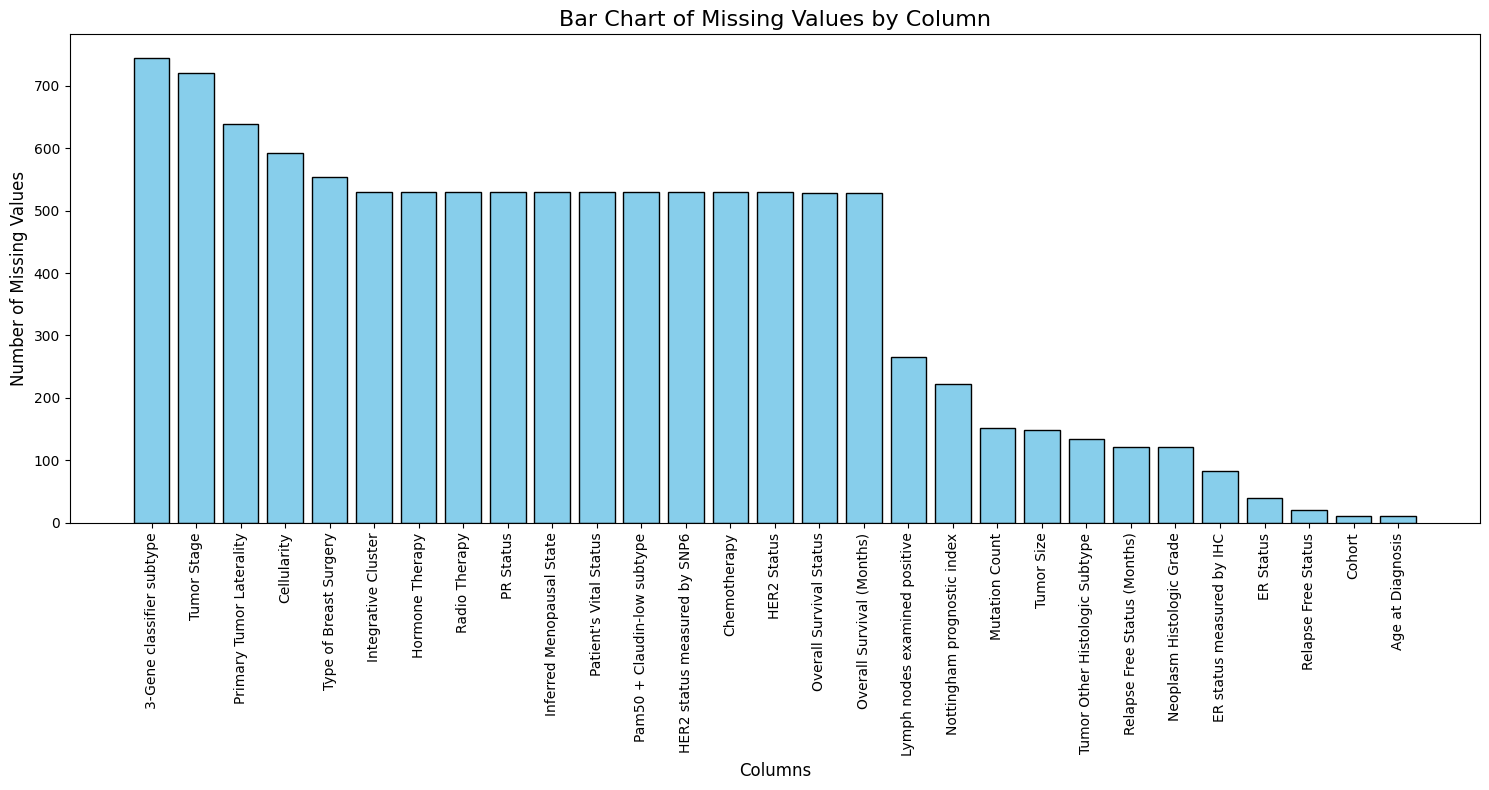

Missing Values Statistics:
3-Gene classifier subtype         745
Tumor Stage                       721
Primary Tumor Laterality          639
Cellularity                       592
Type of Breast Surgery            554
Integrative Cluster               529
Hormone Therapy                   529
Radio Therapy                     529
PR Status                         529
Inferred Menopausal State         529
Patient's Vital Status            529
Pam50 + Claudin-low subtype       529
HER2 status measured by SNP6      529
Chemotherapy                      529
HER2 Status                       529
Overall Survival Status           528
Overall Survival (Months)         528
Lymph nodes examined positive     266
Nottingham prognostic index       222
Mutation Count                    152
Tumor Size                        149
Tumor Other Histologic Subtype    135
Relapse Free Status (Months)      121
Neoplasm Histologic Grade         121
ER status measured by IHC          83
ER Status              

In [ ]:
# Step 1: Calculate missing values for each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Step 2: Filter columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = missing_percentage[missing_values.index]

# Step 3: Create a bar chart for missing values
plt.figure(figsize=(15, 8))  # Adjust figure size for better readability
plt.bar(missing_values.index, missing_values.values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for all columns
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.title('Bar Chart of Missing Values by Column', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Print missing value statistics for reference
print("Missing Values Statistics:")
print(missing_values)

<ipython-input-8-1af07c604090>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surgery_counts.index, y=surgery_counts.values, palette='muted')


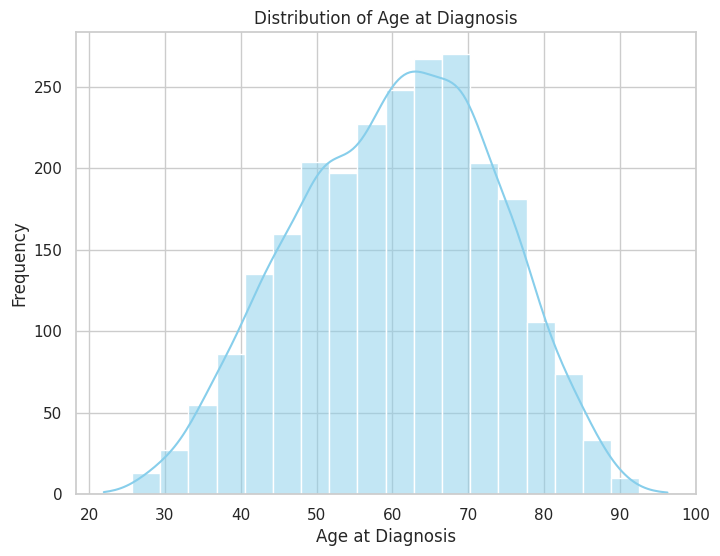

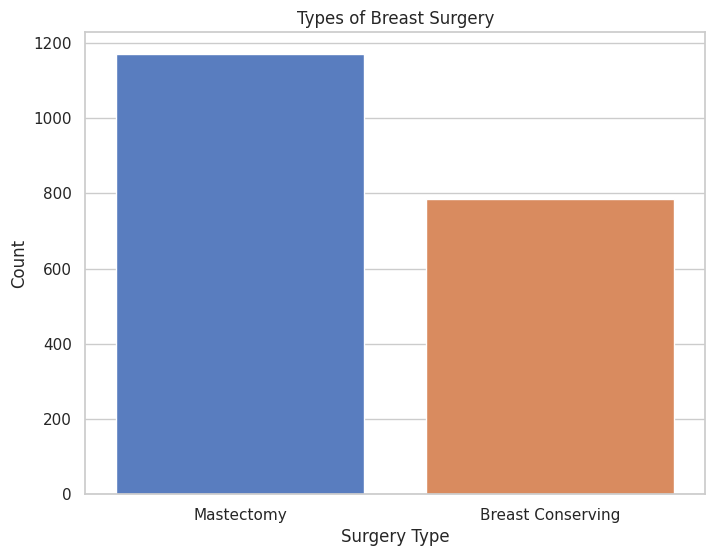

<ipython-input-8-1af07c604090>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_type_counts.index, y=cancer_type_counts.values, palette='pastel')


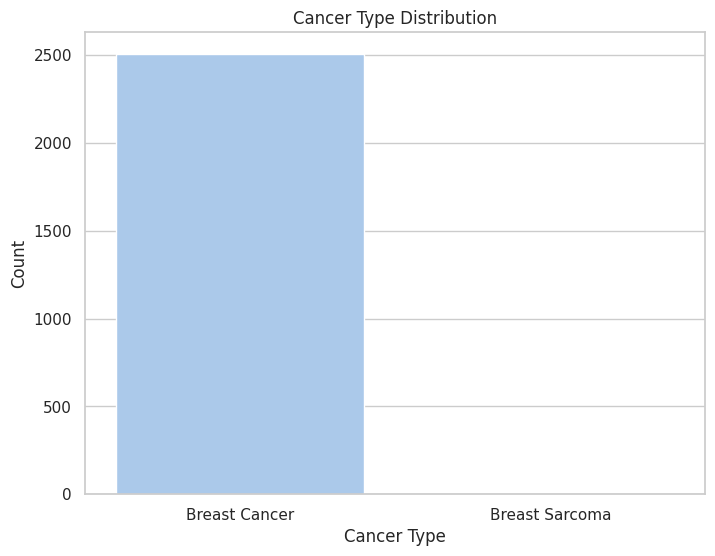

<ipython-input-8-1af07c604090>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_type_detailed_counts.values, y=cancer_type_detailed_counts.index, palette='coolwarm')


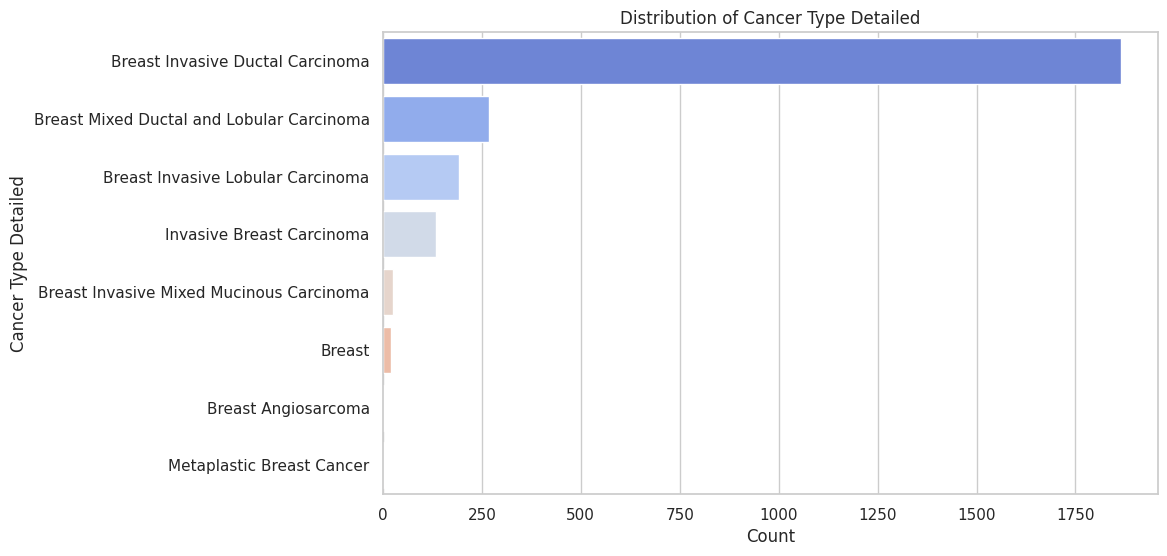

In [ ]:
sns.set(style="whitegrid")

# Univariate Analysis: Age of Diagnosis
plt.figure(figsize=(8, 6))
sns.histplot(data['Age at Diagnosis'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')

# Univariate Analysis: Type of Breast Surgery
plt.figure(figsize=(8, 6))
surgery_counts = data['Type of Breast Surgery'].value_counts()
sns.barplot(x=surgery_counts.index, y=surgery_counts.values, palette='muted')
plt.title('Types of Breast Surgery')
plt.xlabel('Surgery Type')
plt.ylabel('Count')
plt.show()

# Univariate Analysis: Cancer Type
plt.figure(figsize=(8, 6))
cancer_type_counts = data['Cancer Type'].value_counts()
sns.barplot(x=cancer_type_counts.index, y=cancer_type_counts.values, palette='pastel')
plt.title('Cancer Type Distribution')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
cancer_type_detailed_counts = data['Cancer Type Detailed'].value_counts()
sns.barplot(x=cancer_type_detailed_counts.values, y=cancer_type_detailed_counts.index, palette='coolwarm')
plt.title('Distribution of Cancer Type Detailed')
plt.xlabel('Count')
plt.ylabel('Cancer Type Detailed')
plt.show()

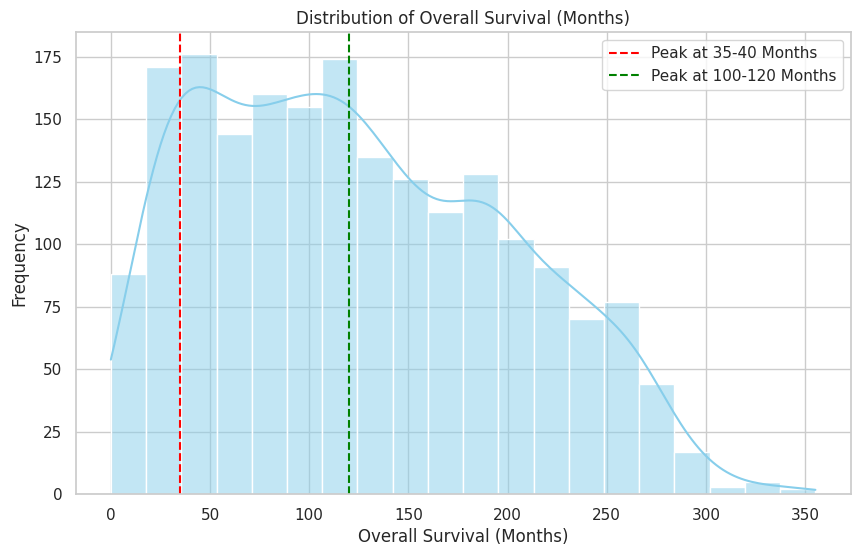

<ipython-input-9-934b834d81a1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_status_counts.index, y=survival_status_counts.values, palette='pastel')


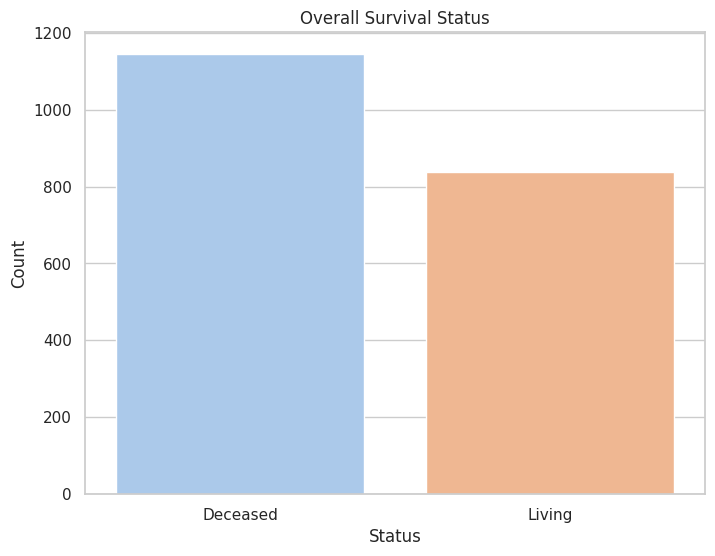

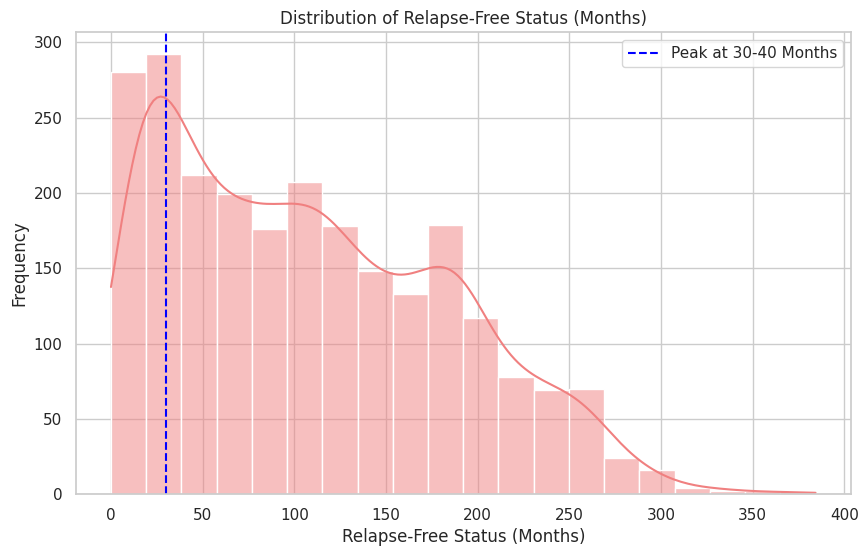

<ipython-input-9-934b834d81a1>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relapse_status_counts.index, y=relapse_status_counts.values, palette='muted')


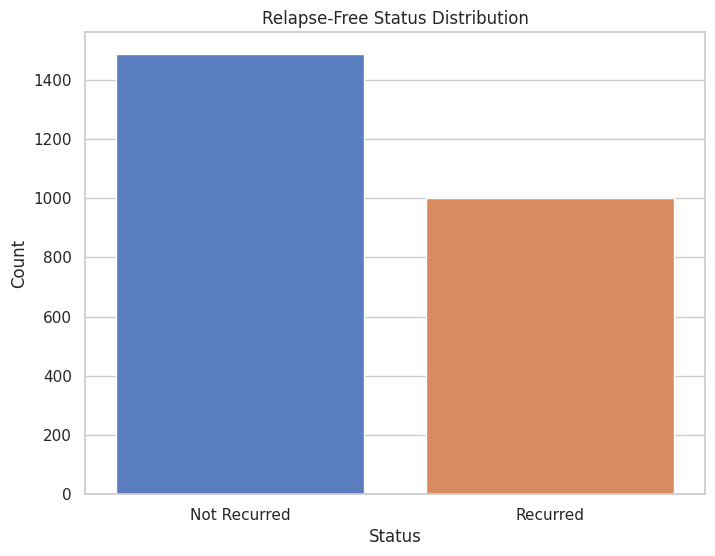

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Overall Survival (Months)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Overall Survival (Months)')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Frequency')
plt.axvline(35, color='red', linestyle='--', label='Peak at 35-40 Months')
plt.axvline(120, color='green', linestyle='--', label='Peak at 100-120 Months')
plt.legend()
plt.show()

# Univariate Analysis: Overall Survival Status
plt.figure(figsize=(8, 6))
survival_status_counts = data['Overall Survival Status'].value_counts()
sns.barplot(x=survival_status_counts.index, y=survival_status_counts.values, palette='pastel')
plt.title('Overall Survival Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Univariate Analysis: Relapse-Free Status (Months)
plt.figure(figsize=(10, 6))
sns.histplot(data['Relapse Free Status (Months)'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Relapse-Free Status (Months)')
plt.xlabel('Relapse-Free Status (Months)')
plt.ylabel('Frequency')
plt.axvline(30, color='blue', linestyle='--', label='Peak at 30-40 Months')
plt.legend()
plt.show()

# Univariate Analysis: Relapse-Free Status
plt.figure(figsize=(8, 6))
relapse_status_counts = data['Relapse Free Status'].value_counts()
sns.barplot(x=relapse_status_counts.index, y=relapse_status_counts.values, palette='muted')
plt.title('Relapse-Free Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [ ]:
data["Patient's Vital Status" ] = data["Patient's Vital Status" ].map({'Died of Disease': 1, 'Died of Other Causes': 0, 'Living': 0})

# Drop rows where null
data = data.dropna(subset=["Patient's Vital Status" , 'Overall Survival (Months)'])

# Create the 10-year outcome variable
data['10_year_outcome'] = (data['Overall Survival (Months)'] <= 120) & (data["Patient's Vital Status"] == 1)

<ipython-input-10-df114d02d834>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['10_year_outcome'] = (data['Overall Survival (Months)'] <= 120) & (data["Patient's Vital Status"] == 1)


In [ ]:
features = [
    'Age at Diagnosis', 'Tumor Size', 'Tumor Stage',
    'Neoplasm Histologic Grade', 'ER Status', 'PR Status',
    'HER2 Status', 'Hormone Therapy', 'Radio Therapy',
    'Chemotherapy', 'Lymph nodes examined positive'
]
X = data[features]
y = data['10_year_outcome']

In [ ]:
# Handle missing values (imputation)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)

In [ ]:
# Encode categorical variables
X_encoded = pd.get_dummies(X_imputed, drop_first=True)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


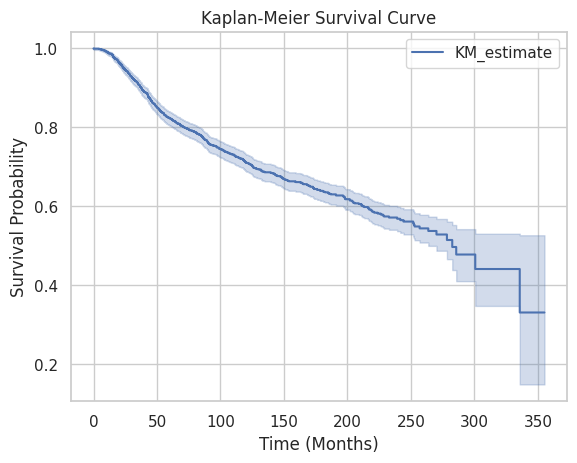

In [ ]:
kmf = KaplanMeierFitter()

# Plot Kaplan-Meier curve
kmf.fit(durations=data['Overall Survival (Months)'], event_observed=data["Patient's Vital Status" ])
kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.show()

                                   coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                      
Age at Diagnosis               0.007850   1.007881  0.004507       -0.000983   
Tumor Size                     0.007118   1.007143  0.002607        0.002007   
Tumor Stage                    0.381971   1.465170  0.093396        0.198918   
Neoplasm Histologic Grade      0.283631   1.327942  0.089554        0.108108   
Lymph nodes examined positive  0.059952   1.061785  0.010678        0.039024   
ER Status_Positive            -0.076718   0.926151  0.148394       -0.367564   
PR Status_Positive            -0.046727   0.954348  0.113438       -0.269061   
HER2 Status_Positive           0.447607   1.564563  0.130443        0.191944   
Hormone Therapy_Yes           -0.202126   0.816992  0.113277       -0.424144   
Radio Therapy_Yes             -0.227558   0.796476  0.105953       -0.435222   
Chemotherapy_Yes               0.140600 

<Axes: xlabel='log(HR) (95% CI)'>

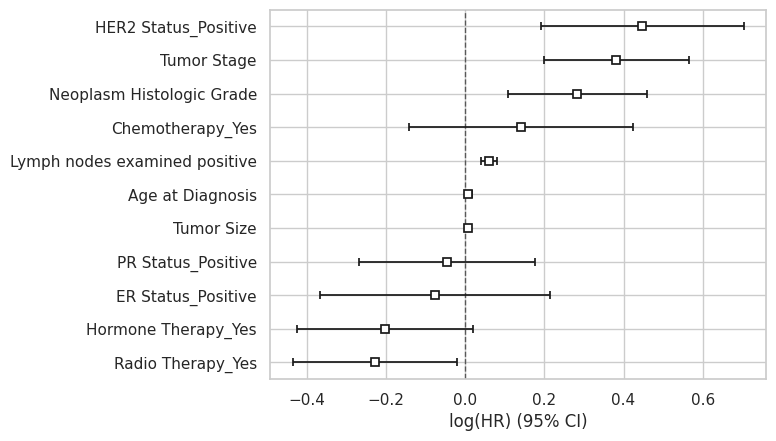

In [ ]:
from lifelines import CoxPHFitter
cox_data = data[['Overall Survival (Months)', "Patient's Vital Status" ] + features].copy()
cox_data = cox_data.dropna()  # Drop rows with missing values for survival analysis
cox_data = pd.get_dummies(cox_data, drop_first=True)  # Encode categorical variables

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='Overall Survival (Months)', event_col="Patient's Vital Status")

# Summary of the Cox model
print(cox_model.summary)

# Plot hazard ratios
cox_model.plot()

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate all models, including Random Forest
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    if roc_auc != "N/A":
        print(f"ROC-AUC: {roc_auc:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Random Forest Feature Importance
rf_model = models['Random Forest']
feature_importances = rf_model.feature_importances_
feature_names = X.columns

Logistic Regression Performance:
Accuracy: 0.68
ROC-AUC: 0.63
              precision    recall  f1-score   support

       False       0.75      0.80      0.78       276
        True       0.47      0.39      0.43       120

    accuracy                           0.68       396
   macro avg       0.61      0.60      0.60       396
weighted avg       0.67      0.68      0.67       396

----------------------------------------
SVM Performance:
Accuracy: 0.66
ROC-AUC: 0.60
              precision    recall  f1-score   support

       False       0.69      0.92      0.79       276
        True       0.27      0.07      0.11       120

    accuracy                           0.66       396
   macro avg       0.48      0.49      0.45       396
weighted avg       0.56      0.66      0.58       396

----------------------------------------
Decision Tree Performance:
Accuracy: 0.68
ROC-AUC: 0.57
              precision    recall  f1-score   support

       False       0.73      0.84      0.78  